## **Code along 00 - linear regression**

In a simple linear regression, we assume a model <h2>
$\mathbf{Y} = \beta_0 + \beta_1 \mathbf{X} + \epsilon$,
</h2>

where $\beta_0$ and $\beta_1$ are two unknown constants that represent the **intercept** and **slope**,<br>
also knows as **coefficients** or **parameters**, and $\epsilon$ is the error term

*kärt barn har många namn*

<left>

| $Y$  |$\mathbf{X}$   |
|---|---|
|respone   |predictor   |
|dependent   |independent   |
|prediction   |feature   |

</left>

ISLR standard is ^ hat for estimates

**Residual sum of square** (RSS) <h2>

$\sum_{i=1}^m(y_i-\hat y_i)^2$ </h2>



In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Data/ISLR/Advertising.csv", index_col=0)

df.head(10)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [36]:
# EDA - Exploratory data analysts

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [38]:
# Ett case kan vara att vi är intresserade av sales,
# Chêfen: "Hur ska vi budgetera våra ads och fördela över TV, radio eller tidning?"

In [39]:
df.shape # 200 samples, 3 features, 1 label

(200, 4)

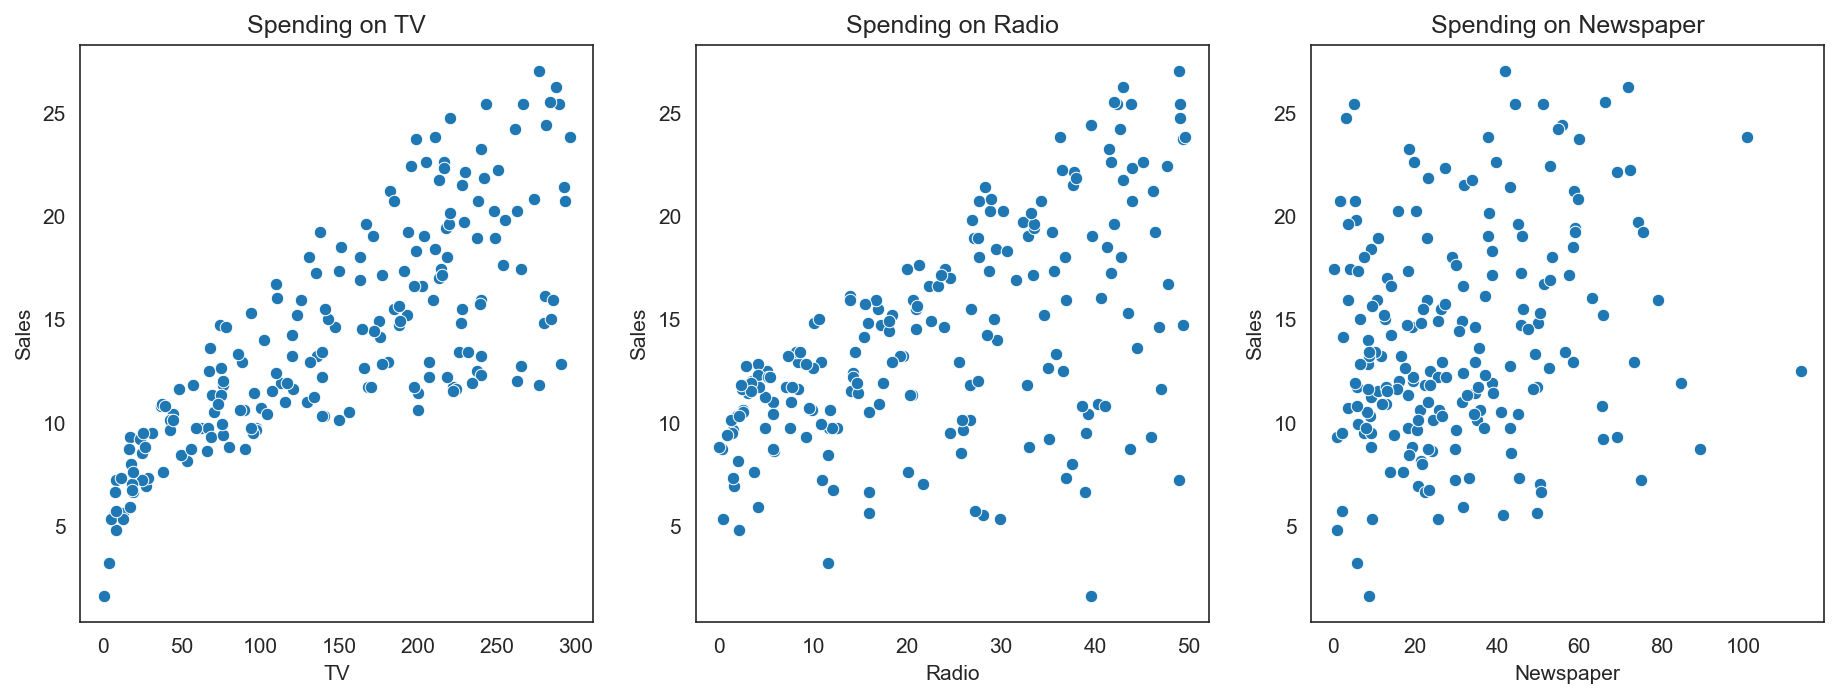

In [40]:
number_features = df.shape[1]-1 # för att skapa plottar

fig, ax = plt.subplots(1, number_features, figsize = (15,5), dpi = 150)
sns.set_style('darkgrid')
for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(df, x = feature, y = "Sales", ax=ax[i])
    ax[i].set_title(f"Spending on {feature}")

>*🍌 Korrelation och kausalitet är ej samma. Sales kan vara korrelerat med att jag käkar massa bananer, men det betyder inte att jag käkar bananer leder till högre sales.*

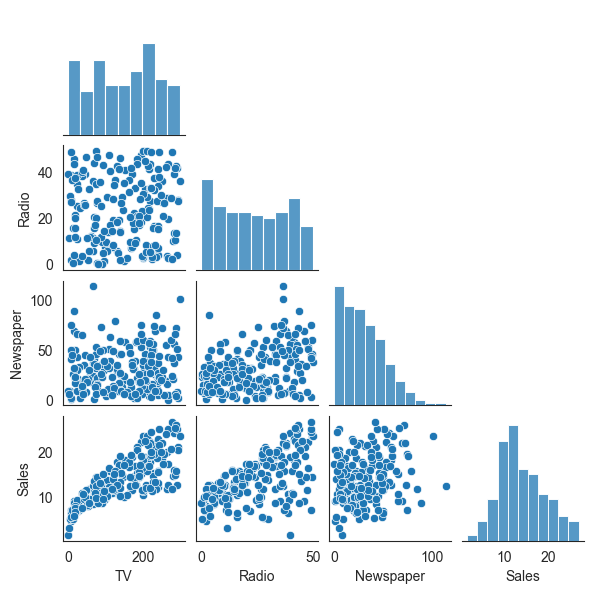

In [41]:
# more EDA 
# 6 or more features, u probably don't wanna run pairplot
sns.set_style('white')
ax = sns.pairplot(df, height=1.5, corner=True) # snabb överblick

---
# Simple linear regression

En variabel/feature (predictor/response variable)

In [42]:
X, y = df["TV"], df["Sales"]

X, y

(1      230.1
 2       44.5
 3       17.2
 4      151.5
 5      180.8
        ...  
 196     38.2
 197     94.2
 198    177.0
 199    283.6
 200    232.1
 Name: TV, Length: 200, dtype: float64,
 1      22.1
 2      10.4
 3       9.3
 4      18.5
 5      12.9
        ... 
 196     7.6
 197     9.7
 198    12.8
 199    25.5
 200    13.4
 Name: Sales, Length: 200, dtype: float64)

In [43]:
import numpy as np
beta_1, beta_0 = np.polyfit(X,y, deg=1)
beta_0, beta_1

(7.0325935491276965, 0.04753664043301974)

In [44]:
y_hat = lambda x: beta_0 + beta_1 * x

y_hat(10)

7.507959953457894

[Text(0.5, 1.0, 'Regression line on TV ads')]

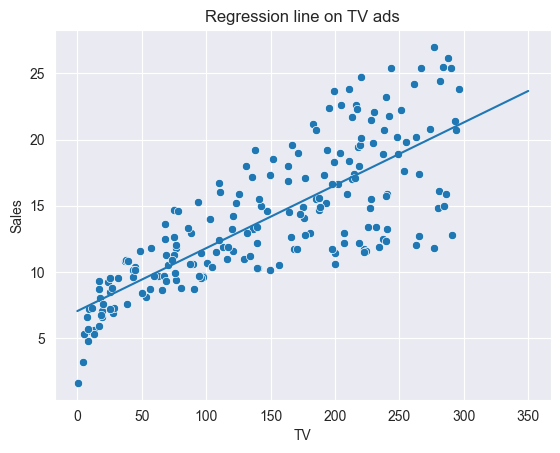

In [45]:
spending = np.linspace(0,350)
sns.set_style('darkgrid')
ax = sns.scatterplot(df, x = "TV", y="Sales")

sns.lineplot(x = spending, y=y_hat(spending))
# beta0 skärning till y, beta1 bestämmer lutning

ax.set(title = "Regression line on TV ads")

<AxesSubplot: xlabel='TV', ylabel='Sales'>

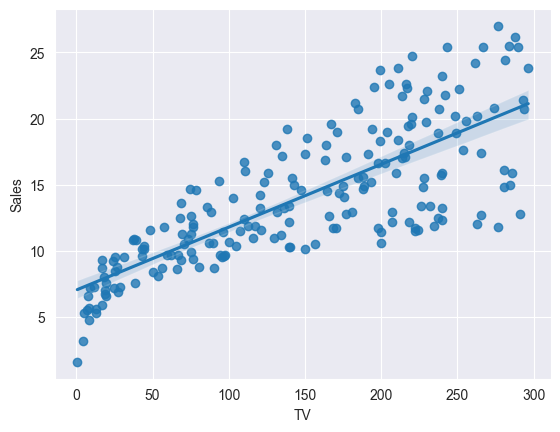

In [46]:
sns.regplot(x=X, y=y) # med konfidensintervallet

## Mutiple linear regression
Alla features/predictors

In [47]:
X, y = df.drop("Sales", axis="columns"), df["Sales"] # splitting df into new X and y

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [48]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [49]:
# behöver dummy kolumn med 1:or
X.insert(0, "Intercept", 1) # muterar df 

In [50]:
X.head()

,Intercept,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4


In [51]:
X.T # transponatet

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
Intercept,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TV,230.1,44.5,17.2,151.5,180.8,8.7,57.5,120.2,8.6,199.8,...,39.5,75.5,17.2,166.8,149.7,38.2,94.2,177.0,283.6,232.1
Radio,37.8,39.3,45.9,41.3,10.8,48.9,32.8,19.6,2.1,2.6,...,41.1,10.8,4.1,42.0,35.6,3.7,4.9,9.3,42.0,8.6
Newspaper,69.2,45.1,69.3,58.5,58.4,75.0,23.5,11.6,1.0,21.2,...,5.8,6.0,31.6,3.6,6.0,13.8,8.1,6.4,66.2,8.7


In [52]:
X.T@X # @ operator = matmul operator
# in numpy the matmul operator is operator overloaded to handle matrix multiplication

# normalekvationen 

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [53]:
# normalekvationen - OLS
beta_hat = np.linalg.inv(X.T@X)@X.T@y

beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [54]:
regression_fit = lambda X,y: np.linalg.inv(X.T@X)@X.T@y

beta_hat = regression_fit(X,y)

# regression fit som ger oss linjer med beta-parametrar för att rita upp hyperplan i fyra dimensioner
_

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [55]:
# X * beta_hat
predict = lambda x, beta: np.dot(x, beta)
# gör om x till vektor, multiplicera med beta (dot(skalärprodukt))

# 1 = dummy för intercept
test_sample = [1, 230, 38, 69]

y_hat = predict(test_sample, beta_hat) # skalärprodukt multipliceras elementvis och adderas ihop

print(f'With $230k on TV, $38k on radio and $69k on paper we get predicted sales on {y_hat:.3f}k units')

With $230k on TV, $38k on radio and $69k on paper we get predicted sales on 20.557k units


## Train|test split

In [66]:
train_fraction = int(len(df)*0.7)
seed = 42
# form av sampling, plocka ur 
# sampla med återläggning, sampla utan återläggning
train = df.sample(n=train_fraction, random_state=seed, replace=False) # om vi lägger tillbaka finns riska att ta samma sak en gång till
train.head()

,TV,Radio,Newspaper,Sales
96,163.3,31.6,52.9,16.9
16,195.4,47.7,52.9,22.4
31,292.9,28.3,43.2,21.4
159,11.7,36.9,45.2,7.3
129,220.3,49.0,3.2,24.7


In [67]:
test = df.drop(train.index)
train.shape, test.shape 
# kontrollera att den faktiskt har droppat sen

((140, 4), (60, 4))

In [68]:
# splitta upp i xtrain, ytrain, xtest and ytest

X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]
X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"]

# måste lägga in 1:or

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

# now we can make prediction

((140, 4), (140,), (60, 4), (60,))

# Prediction

In [72]:
# vi ska inte träna hela, bara x_train
beta_hat = regression_fit(X_train, y_train)
print(f'Beta parametes:\n{beta_hat}')

# flera samples på en gång, vi lägger in hela matrisen
predict = lambda X, weights: X @ weights



# y_hat = predict(X_test, beta_hat) # currently not aligned
# med dimensionsanalys

beta_hat = np.reshape(beta_hat.to_numpy(), (4,1)) # reshape till kolumnvektor för att kunna använda xmatris och multiplicera

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5] # prediction för första fem värden

Beta parametes:
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [70]:
X_test.iloc[1] 
# spending $120.2k on TV, $19.6k on radio and $11.6k on newspaper gives prediction on 12.19k units

Intercept      1.0
TV           120.2
Radio         19.6
Newspaper     11.6
Name: 8, dtype: float64

In [61]:
# vi har fått ut y-hat som är vår prediction, hur bra är det? vi evaluerar

# Evaluate model performance

**Mean absolute error** (MAE) <h3>

${\frac{1}{m}}\sum_{i=1}^{m}|y_i-\hat y_i|$
</h3>

```mean_absolute_error = 1/m*np.sum(np.abs(y_test-y_hat))```

**Mean square error** (MSE) <h3>

${\frac{1}{m}}\sum_{i=1}^m(y_i-\hat y_i)^2$
</h3>

```mean_squared_error = 1/m*np.sum((y_test-y_hat)**2)```

**Root mean squared error** (RMSE) <h3>

$\sqrt{MSE}$

</h3>

```root_mean_squared_error = np.sqrt(mean_squared_error)```

In [73]:
m = len(y_test)

# removed extra dimension (60,1) -> (60,)
y_hat = np.reshape(y_hat, (m))

mean_absolute_error = 1/m*np.sum(np.abs(y_test-y_hat))
mean_squared_error = 1/m*np.sum((y_test-y_hat)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

mean_absolute_error, mean_squared_error, root_mean_squared_error

(1.3244490959726545, 3.540425618238493, 1.8816018755939028)